In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

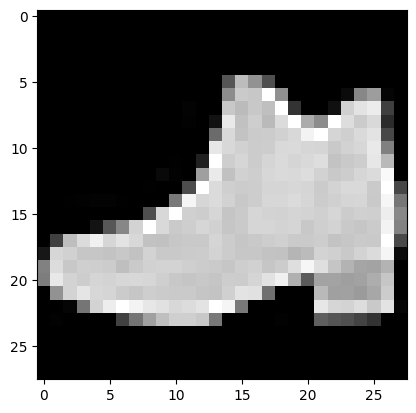

In [18]:
plt.imshow(x_train[15], cmap='grey')

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [24]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(10)
])

c:\Users\Roman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6630 - sparse_categorical_accuracy: 0.7688 - val_loss: 0.4612 - val_sparse_categorical_accuracy: 0.8362
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3968 - sparse_categorical_accuracy: 0.8578 - val_loss: 0.4074 - val_sparse_categorical_accuracy: 0.8521
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.3986 - val_sparse_categorical_accuracy: 0.8549
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3303 - sparse_categorical_accuracy: 0.8785 - val_loss: 0.3660 - val_sparse_categorical_accuracy: 0.8684
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3121 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.3558 - val_sparse_categorical_accuracy: 0.8751
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2975 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.3825 - val_sparse_categorical_accuracy:

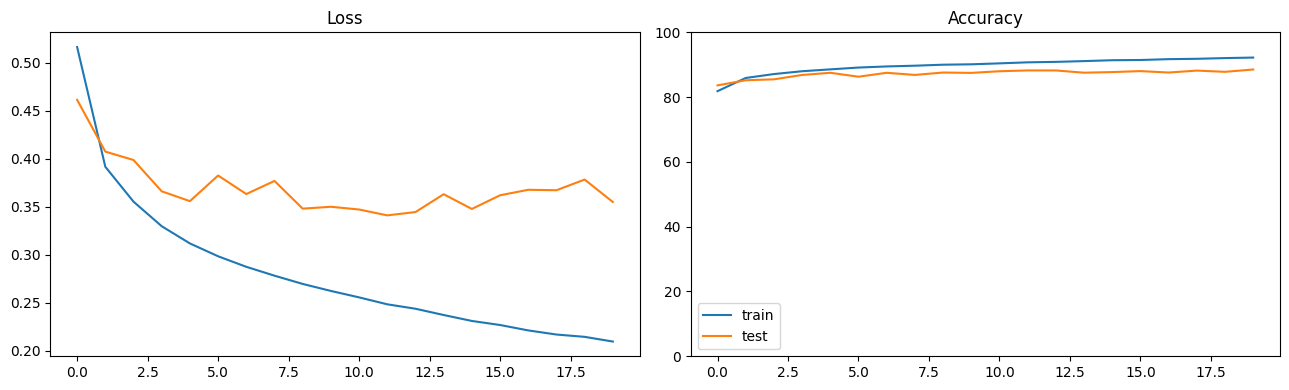

In [41]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
plot_history(history)

In [42]:
### Drop out

Epoch 1/5


c:\Users\Roman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.4866 - sparse_categorical_accuracy: 0.4359 - val_loss: 0.6388 - val_sparse_categorical_accuracy: 0.7798
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0456 - sparse_categorical_accuracy: 0.5820 - val_loss: 0.5961 - val_sparse_categorical_accuracy: 0.7933
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9960 - sparse_categorical_accuracy: 0.6004 - val_loss: 0.6003 - val_sparse_categorical_accuracy: 0.7939
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9576 - sparse_categorical_accuracy: 0.6110 - val_loss: 0.5634 - val_sparse_categorical_accuracy: 0.8064
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9421 - sparse_categorical_accuracy: 0.6156 - val_loss: 0.5719 - val_sparse_categorical_accuracy: 0.8093
Drop_out: {0.8}


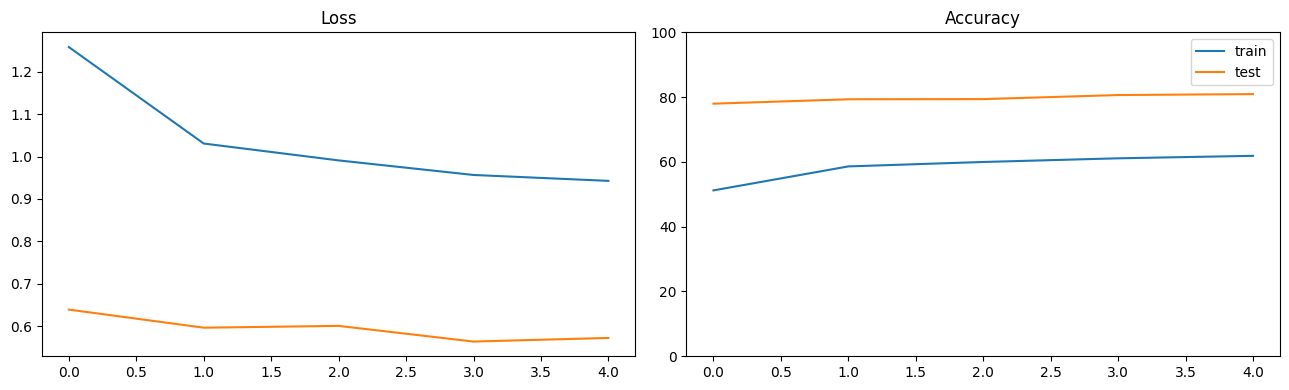

In [48]:
for drop_out in [0.8]:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(drop_out),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    print(f'Drop_out:', {drop_out})
    plot_history(history)

In [51]:
history.history

{'loss': [1.2586959600448608,
  1.0309420824050903,
  0.9910839200019836,
  0.9566974639892578,
  0.9427781701087952],
 'sparse_categorical_accuracy': [0.512066662311554,
  0.5861333608627319,
  0.5998166799545288,
  0.6111166477203369,
  0.6188166737556458],
 'val_loss': [0.6388244032859802,
  0.5961304903030396,
  0.6003495454788208,
  0.5633889436721802,
  0.5719327926635742],
 'val_sparse_categorical_accuracy': [0.7797999978065491,
  0.7932999730110168,
  0.7939000129699707,
  0.8064000010490417,
  0.8093000054359436]}